# Linear Regression

In [1]:
from __future__ import print_function
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import RidgeCV
from sklearn import metrics
import warnings

warnings.filterwarnings('ignore')

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pandas import Series, DataFrame

In [2]:
#importing the dataset
dataset=pd.read_csv("C:/Users/deep/data/Energy.csv", encoding = 'cp1252')
dataset.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
#splitting data into test and train
train=dataset.sample(frac=0.8,random_state=200)
test = dataset.drop(train.index)
train.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
355,0.79,637.0,343.0,147.0,7.0,5,0.25,2,38.98,45.97
667,0.64,784.0,343.0,220.5,3.5,5,0.40,3,18.46,21.53
390,0.90,563.5,318.5,122.5,7.0,4,0.25,3,32.68,32.83
356,0.76,661.5,416.5,122.5,7.0,2,0.25,2,36.95,36.87
269,0.71,710.5,269.5,220.5,3.5,3,0.10,5,10.70,13.75


# Is the relationship significant ?
--> we can check through coorelation method and by plotting predictor vs response plots,  which will help to verify the relationship

                      Relative_Compactness  Surface_Area  Wall_Area  \
Relative_Compactness              1.000000     -0.991888  -0.201397   
Surface_Area                     -0.991888      1.000000   0.190807   
Wall_Area                        -0.201397      0.190807   1.000000   
Roof_Area                        -0.869443      0.882418  -0.293451   
Heating_Load                      0.632902     -0.667894   0.447631   

                      Roof_Area  Heating_Load  
Relative_Compactness  -0.869443      0.632902  
Surface_Area           0.882418     -0.667894  
Wall_Area             -0.293451      0.447631  
Roof_Area              1.000000     -0.864976  
Heating_Load          -0.864976      1.000000  


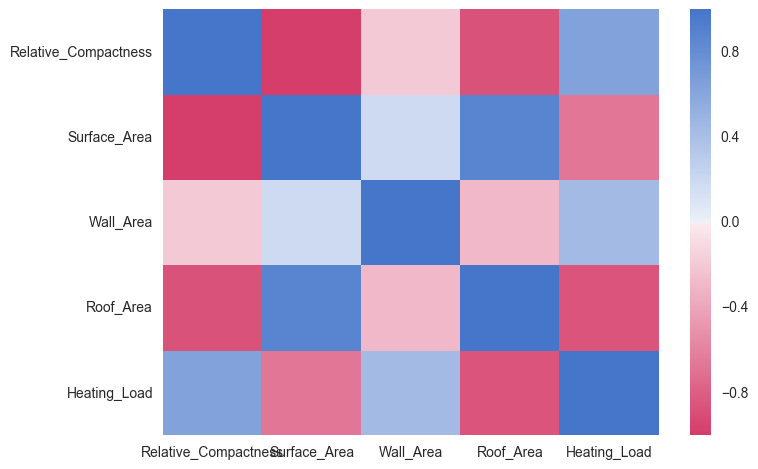

In [4]:
cmap = sns.diverging_palette(0,255,sep=1, n=256,as_cmap=True)
correlation=train[['Relative_Compactness','Surface_Area','Wall_Area','Roof_Area','Heating_Load']].corr()
print(correlation);
sns.heatmap(correlation, cmap=cmap)

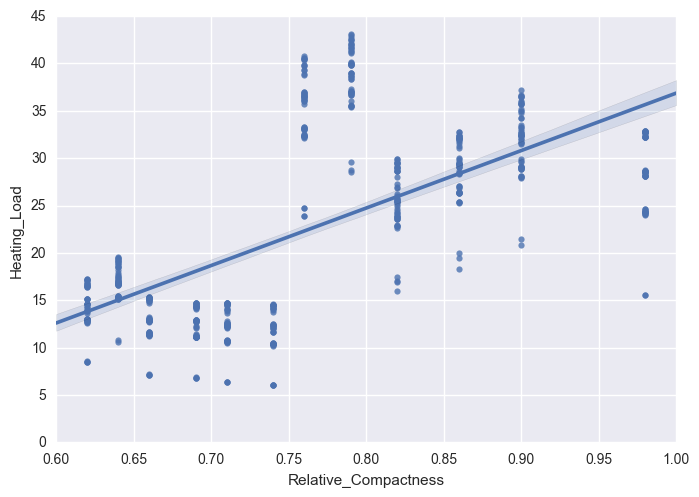

In [5]:
x=train['Relative_Compactness']
y=train['Heating_Load']
sns.regplot(x,y,data=train)

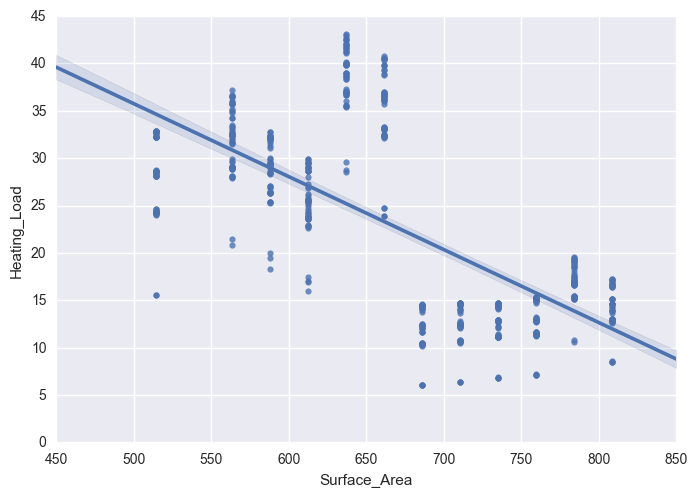

In [6]:
x=train['Surface_Area']
y=train['Heating_Load']
sns.regplot(x,y,data=train)

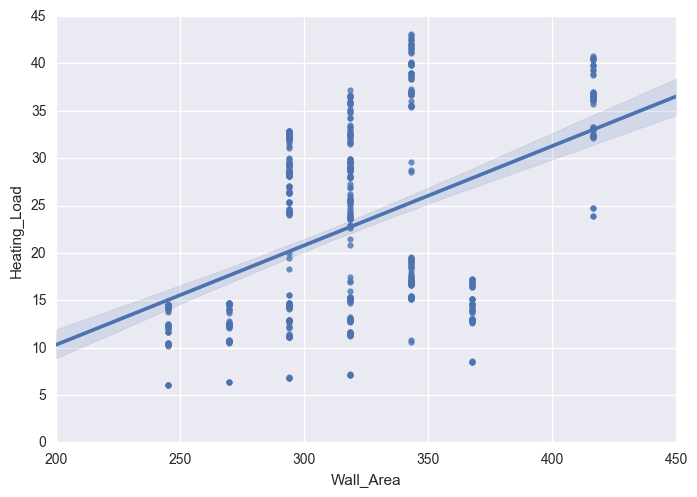

In [7]:
x=train['Wall_Area']
y=train['Heating_Load']
sns.regplot(x,y,data=train)

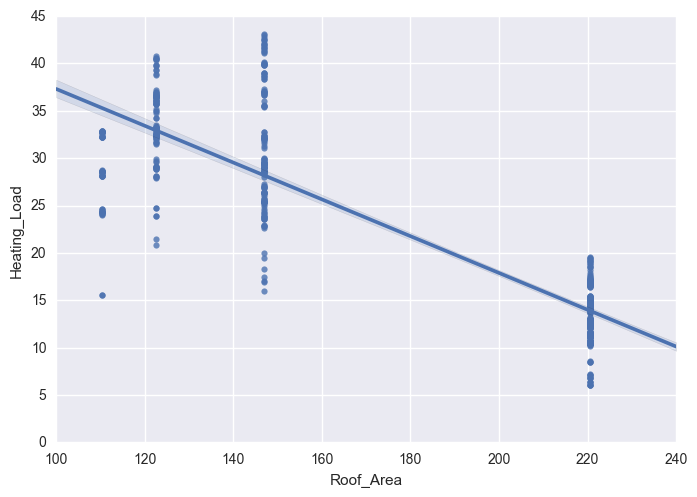

In [8]:
x=train['Roof_Area']
y=train['Heating_Load']
sns.regplot(x,y,data=train)

# Is there any Multi-colinearity in the model ?
Yes, there is more multi-colinearity in (Relative_Compactness, Wall_Area),(Surface_Area, Wall_Area) and (Surface_Area,Roof_Area), (Wall_Area and Roof_Area)

                      Relative_Compactness  Surface_Area  Wall_Area  Roof_Area
Relative_Compactness              1.000000     -0.991888  -0.201397  -0.869443
Surface_Area                     -0.991888      1.000000   0.190807   0.882418
Wall_Area                        -0.201397      0.190807   1.000000  -0.293451
Roof_Area                        -0.869443      0.882418  -0.293451   1.000000


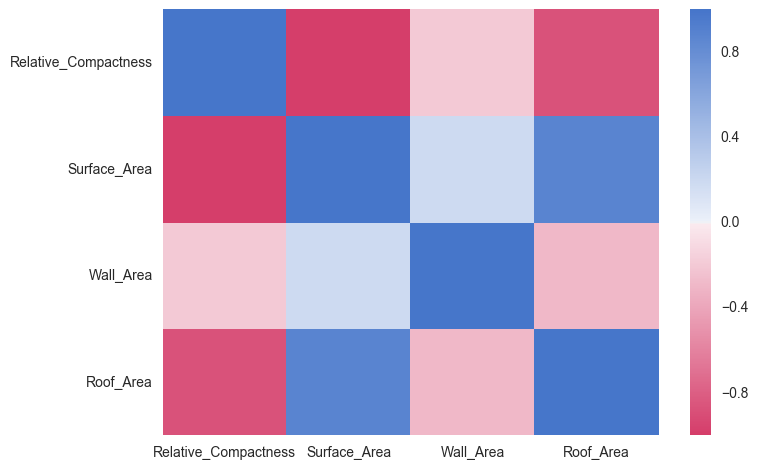

In [9]:
cmap = sns.diverging_palette(0,255,sep=1, n=256,as_cmap=True)
correlation=train[['Relative_Compactness','Surface_Area','Wall_Area','Roof_Area']].corr()
print(correlation);
sns.heatmap(correlation, cmap=cmap)

#  In the model, are predictor variables independent of all the other predictor variables?
        Almost Independent

In [10]:
X = train[["Relative_Compactness","Surface_Area","Wall_Area"]]
y = train[["Heating_Load"]]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Print the coefficients
print (results.intercept_, results.coef_)

[ 248.86678183] [[-133.74395627   -0.24933713    0.13571692]]


In [11]:
OLS_model = sm.OLS(y, X)
OLS_results = OLS_model.fit()
# Statsmodels gives R-like statistical output
OLS_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Heating_Load   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     5334.
Date:                Wed, 22 Nov 2017   Prob (F-statistic):               0.00
Time:                        13:55:56   Log-Likelihood:                -1831.9
No. Observations:                 614   AIC:                             3670.
Df Residuals:                     611   BIC:                             3683.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Relative_Compactness    23.3534      1.197     19.518      0.000        21.004    25.703
Surface_Area            -0.0610      0.002    -35.686      0.000        -0.064    -0.058
Wall_Area                0.1431      0.005     31.588      0.000         0.134     0.152
==============================================================================
Omnibus:                       34.625   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.289
Skew:                           0.327   Prob(JB):                     1.22e-16
Kurtosis:                       4.561   Cond. No.                     4.61e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#  In model rank the most significant predictor variables and exclude insignificant ones from the model

In [12]:
#Rank co-efficients 
coeff_df = DataFrame(X.columns)
coeff_df.columns = ['Features']
coeff_df['Coefficient Estimates'] =results.coef_.reshape(3,1)
coeff_df

coeff_df['coef_ranked'] = coeff_df['Coefficient Estimates'].rank(ascending=0)
coeff_df

,Features,Coefficient Estimates,coef_ranked
0,Relative_Compactness,-133.743956,3.0
1,Surface_Area,-0.249337,2.0
2,Wall_Area,0.135717,1.0


In [13]:
#predicting response
y_pred = results.predict(test[["Relative_Compactness","Roof_Area","Wall_Area"]])
from sklearn import metrics
rmse =np.sqrt(metrics.mean_squared_error(test['Heating_Load'], y_pred))
print(rmse)

126.004184189


# Does the Model make sense ?

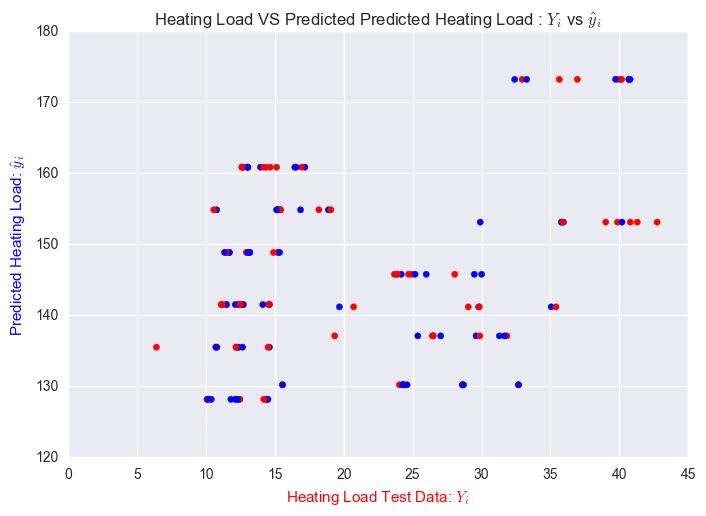

In [14]:
plt.scatter(test["Heating_Load"], y_pred, color=['red','blue'])
plt.xlabel("Heating Load Test Data: $Y_i$", color='red')
plt.ylabel("Predicted Heating Load: $\hat{y}_i$", color='blue')
plt.title("Heating Load VS Predicted Predicted Heating Load : $Y_i$ vs $\hat{y}_i$")

By plotting predicted values VS actual test values, we can see that all the predicted values are almost aligned with actual values of Test Data

# Does regularization Help ?

In [15]:
X = train[["Relative_Compactness","Roof_Area","Wall_Area"]]
ridge = Ridge(fit_intercept=True, alpha=0.5)
results = ridge.fit(X,y)
y_pred_ridge = results.predict(test[["Relative_Compactness","Roof_Area","Wall_Area"]])
rmse =np.sqrt(metrics.mean_squared_error(test['Heating_Load'], y_pred_ridge))
print(rmse)

4.45238221638


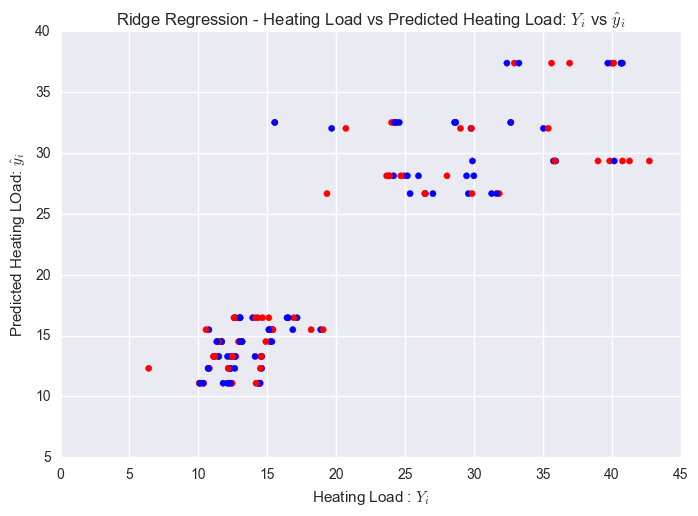

In [16]:
plt.scatter(test["Heating_Load"], y_pred_ridge,color=['red','blue'])
plt.xlabel("Heating Load : $Y_i$")
plt.ylabel("Predicted Heating LOad: $\hat{y}_i$")
plt.title("Ridge Regression - Heating Load vs Predicted Heating Load: $Y_i$ vs $\hat{y}_i$")

Using ridge regression has reduced the rmse significantly.

--------------------------------------------------------------------------------------------------------------------------------

# Logistic Regression

In [17]:
%matplotlib inline
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import warnings
import random
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn import metrics
import statsmodels.api as sm
import scipy.stats as stats 
from sklearn.linear_model import LogisticRegression

plt.rcParams['figure.figsize'] = (10,6)

Logistic Regression is based on Logistic function. The logistic function can take an input from neagtive to positive infinity and it has always an output between 0 and 1 . 

              l(t) = 1/(1+ e^(-t))    where l is logistic function
              
 If we view t as a linear function with a variable x we could express t as:
 
             F(x) = 1/(1+ e^-(b0+b1x))  where t equals to b0+b1(x)  
            
In terms of binary classification we will look into whether it is a success or failure. Inputting the linear regression expression into logistic function allows us to have a linear regression expression values that can vary from postive to nagative infinity, but after the transformation due to logistic expression we will have an output of F(x) that ranges from 0 to 1.

In [18]:
HrData = pd.read_csv("C:/Users/deep/data/HR.csv", sep=',')
HrData.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [19]:
HrData.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## Checking and Removing Null and Bad Data

In [20]:
HrData.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

## Comparing by Plotting most dependent Variables that affect the prediction

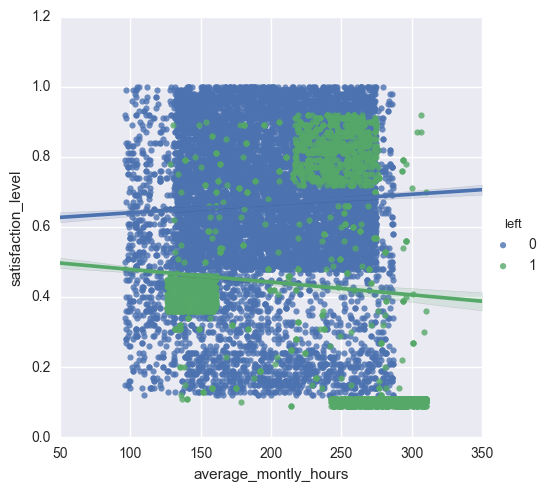

In [21]:
sns.lmplot(y="satisfaction_level", x="average_montly_hours", data=HrData,  hue="left")
sns.plt.show()

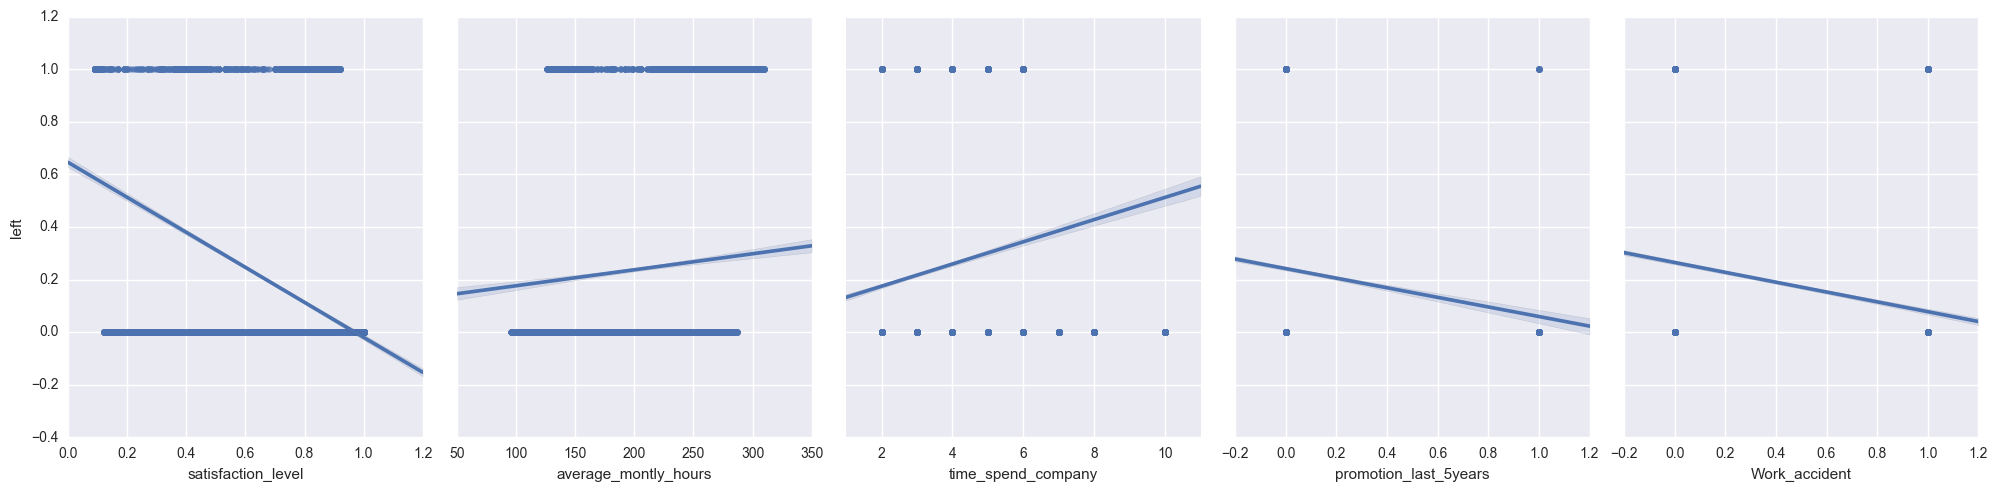

In [22]:
sns.pairplot(HrData, x_vars=['satisfaction_level','average_montly_hours','time_spend_company','promotion_last_5years','Work_accident'],
             y_vars=['left'], size=5, aspect=.8, kind="reg");
#sns.lmplot(x='satisfaction_level', y='left', data=HrData, ci=None)

## Finding Logit and Confidence Interval

In [23]:
#HrData['intercept'] = 1.0
pred=['satisfaction_level','time_spend_company','promotion_last_5years','Work_accident','average_montly_hours']
Hr_Model = sm.Logit(HrData['left'], HrData[pred]).fit()
Hr_Model.summary()

Optimization terminated successfully.
         Current function value: 0.452037
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   left   No. Observations:                14999
Model:                          Logit   Df Residuals:                    14994
Method:                           MLE   Df Model:                            4
Date:                Wed, 22 Nov 2017   Pseudo R-squ.:                  0.1764
Time:                        13:56:12   Log-Likelihood:                -6780.1
converged:                       True   LL-Null:                       -8232.3
                                        LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
satisfaction_level       -3.6645      0.078    -46.989      0.000        -3.817    -3.512
time_spend_company        0.1996      0.013     15.142      0.000         0.174     0.225
promotion_last_5years    -1.7494      0.253     -6.915      0.000        -2.245    -1.254
Work_accident            -1.4896      0.088    -17.000      0.000        -1.661    -1.318
average_montly_hours      0.0017      0.000      5.806      0.000         0.001     0.002
=========================================================================================
"""

In [24]:
Hr_Model.conf_int()

,0,1
satisfaction_level,-3.817383,-3.511677
time_spend_company,0.173800,0.225483
promotion_last_5years,-2.245257,-1.253551
Work_accident,-1.661386,-1.317899
average_montly_hours,0.001103,0.002227


In [25]:
np.exp(Hr_Model.params)

satisfaction_level       0.025616
time_spend_company       1.220965
promotion_last_5years    0.173878
Work_accident            0.225453
average_montly_hours     1.001667
dtype: float64

## Finding Odd Ratio

In [26]:
# odds ratios and 95% CI
params = Hr_Model.params
conf = Hr_Model.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OddsRatio']
np.exp(conf)

,2.5%,97.5%,OddsRatio
satisfaction_level,0.021985,0.029847,0.025616
time_spend_company,1.189818,1.252927,1.220965
promotion_last_5years,0.105900,0.285489,0.173878
Work_accident,0.189876,0.267697,0.225453
average_montly_hours,1.001104,1.002230,1.001667


In [27]:
HrData.groupby('left').count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
left,,,,,,,,,
0,11428,11428,11428,11428,11428,11428,11428,11428,11428
1,3571,3571,3571,3571,3571,3571,3571,3571,3571


## Creating Logistic Model, Predicting Probability, Coeffecient and Intercept

In [28]:
X = HrData[pred]
#setting target
y = HrData["left"]

lr = LogisticRegression(C=1e9)

#dividing data to have a training and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, random_state=0)

# Logistic regression metrics
LRm = lr.fit(X_train, y_train)

LRm.predict_proba(X_test)  # The returned estimates for all classes are ordered by the label of classes.

array([[ 0.6800976 ,  0.3199024 ],
       [ 0.74661834,  0.25338166],
       [ 0.86780286,  0.13219714],
       ..., 
       [ 0.61988459,  0.38011541],
       [ 0.7708304 ,  0.2291696 ],
       [ 0.33850304,  0.66149696]])

In [29]:
print("Regression coefficents",LRm.coef_)
print("Regression intercept",LRm.intercept_)

Regression coefficents [[ -3.70104399e+00   1.96191112e-01  -1.47292387e+00  -1.46628419e+00
    1.52222564e-03]]
Regression intercept [ 0.07103183]


In [30]:
LRm.decision_function(X_test)

array([-0.75422037, -1.08065725, -1.88167023, ..., -0.48905839,
       -1.21300604,  0.66997233])

In [31]:
LRm.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [32]:
y_pred = LRm.predict(X_test)
print("Accuracy score using Logistic regression is %s" %metrics.accuracy_score(y_test, y_pred))

Accuracy score using Logistic regression is 0.762666666667


## K-Fold Cross Validation, Finding Accuracy of Prediction

In [33]:
k=10
acc=[]
for i in range(k):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=i)
    # Logistic regression metrics
    LRm = lr.fit(X_train, y_train)
    a=metrics.accuracy_score(y_test, LRm.predict(X_test))
    acc.append(a)
    
print (acc)
print (np.mean(acc))
print (np.std(acc))

[0.76266666666666671, 0.76400000000000001, 0.7583333333333333, 0.76833333333333331, 0.76966666666666672, 0.754, 0.76366666666666672, 0.76666666666666672, 0.7543333333333333, 0.76500000000000001]
0.762666666667
0.00518330653798


### Is the relationship significant?
    > Yes, the relationship seems significant based on the calculation and Plotting that I did to get the best possible predictors and target variables. I compared all of that with all possible permutations and combinations and finally got the best fit as my final predicting model of actual House Price.
    > Most Significant Relationships is found were - Satisfaction_Ratio(X1) and Left(Y)
                                                 - Time_Spend_Company(X2) and Left(Y)
                                                 - Average_Hours_Spend(X3) and Left(Y)
                                                 - Promotion_last5_years(X4) and Left(Y)
    > Others were slighlty related and may effect by overfitting data so I kept these 4 as my best fit model.
    
### Are any model assumptions violated?
    > Previously it was violating due to the adding more predictors or removing predictors from the current model. But after all trial and error Model Fits perfect and giving more than 77% accuracy on predictions. However, there is still scope of improvement that can be utilised by using other algorithms.
    
### Cross-validate the model. How well did it do?
    > I used 10 k Fold to cross validate the model. It is giving me accuracy of 0.76 that is similar to the accuracy of my model.